In [1]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
import itertools
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
import sys
sys.path.append('../')
from Utils.utils_func import *
from sklearn.pipeline import Pipeline
import time

### Load train/test set

In [65]:
X_train = np.load('../Data/Extra_leg_room_seat/KGE_Ctxt_Data/X_train.npy')
X_test = np.load('../Data/Extra_leg_room_seat/KGE_Ctxt_Data/X_test.npy')
y_train = np.load('../Data/Extra_leg_room_seat/KGE_Ctxt_Data/y_train.npy')
y_test = np.load('../Data/Extra_leg_room_seat/KGE_Ctxt_Data/y_test.npy')

In [66]:
X_train.shape

(24813, 134)

In [45]:
X_train = X_train[:, 234:284]
X_test = X_test[:, 234:284]

In [46]:
X_train.shape

(24813, 0)

## check the data

### XGBOOST

In [67]:
xgb_model = XGBClassifier(objective="binary:logistic", max_depth=20, n_estimators=100, gamma=1, colsample_bytree=0.95, min_child_weight=2,
subsample=0.85, random_state=42, learning_rate = 0.1, scale_pos_weight=0.9*((len(y_train)-sum(y_train))/(sum(y_train))))
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.95, gamma=1,
              learning_rate=0.1, max_delta_step=0, max_depth=20,
              min_child_weight=2, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=10.984885577434806,
              seed=None, silent=None, subsample=0.85, verbosity=1)

In [68]:
X_train.shape

(24813, 134)

In [69]:
#### Training predictions (to demonstrate overfitting)
train_xgb_predictions = xgb_model.predict(X_train)
train_xgb_probs = xgb_model.predict_proba(X_train)[:, 1]
# Actual class predictions
xgb_predictions = xgb_model.predict(X_test)
# Probabilities for each class
xgb_probs = xgb_model.predict_proba(X_test)[:, 1]
##
# Calculate roc auc
roc_value = roc_auc_score(y_test, xgb_probs)
print('Roc Score: ', roc_value)

Roc Score:  0.8482442839404865


In [57]:
# Print Features
features = pd.read_csv('../Data/Model_data/Features/Extra_leg_room_seat_Features_Ctxt_Cem.csv')

In [22]:
len(features)

57

In [71]:
X_train.shape

(24844, 57)

In [72]:
# Extract feature importances
fi = pd.DataFrame({'feature': features,
                   'importance': xgb_model.feature_importances_}).\
                    sort_values('importance', ascending = False)

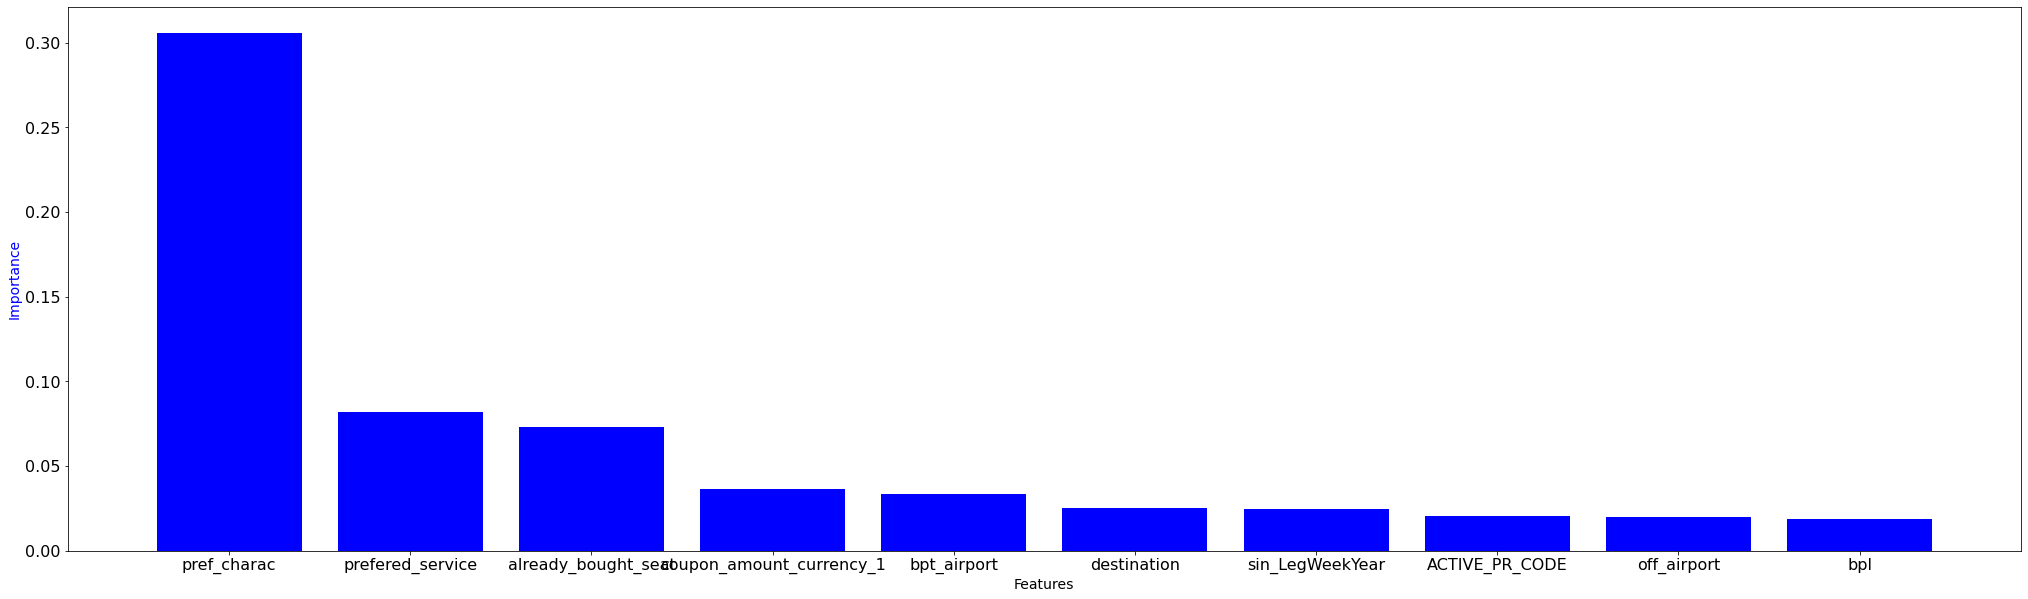

In [74]:
## create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(35, 10))
# make a plot
ax.bar(fi.values[0:10,0], fi.values[0:10,1], color="blue")
# set x-axis label
ax.set_xlabel("Features",fontsize=14)
# set y-axis label
ax.set_ylabel("Importance",color="blue",fontsize=14)
plt.show()

In [55]:
pr_auc_score = average_precision_score(y_test, xgb_probs)
print('PR AUC Score: ', pr_auc_score)

PR AUC Score:  0.5614663425123301


Confusion matrix, without normalization
[[11198    99]
 [  578   347]]


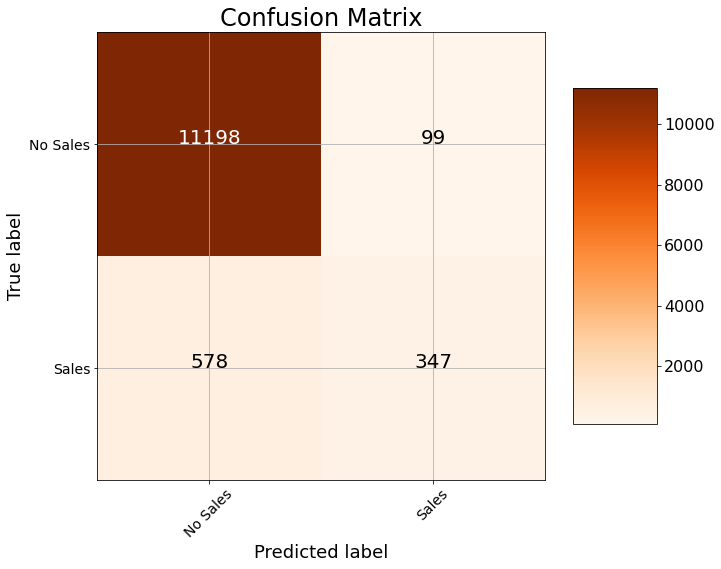

In [158]:
#If we want to change the prob threshold from which we change 
xgb_predictions = (xgb_model.predict_proba(X_test)[:,1] >= 0.5).astype(bool)
# Confusion matrix
cm = confusion_matrix(y_test, xgb_predictions)
plot_confusion_matrix(cm, classes = ['No Sales', 'Sales'], title = 'Confusion Matrix')

In [58]:
list_p = np.arange(0,1,0.01)
list_CR = list()
list_TPR = list()
list_TNR = list()
for p in list_p:
    ## If we want to change the prob threshold from which we change 
    xgb_predictions = (xgb_model.predict_proba(X_test)[:,1] >= p).astype(bool)
    cm = confusion_matrix(y_test, xgb_predictions)
    ##
    list_TPR.append(round(cm[1,1]*100/(cm[1,1] + cm[1,0]),2))
    list_TNR.append(round(cm[0,0]*100/(cm[0,0] + cm[0,1]),2))
    list_CR.append(round(cm[1,1]*100/((cm[1,1] + cm[0,1])*5.8),2))
    ##

In [59]:
import matplotlib.pyplot as plt

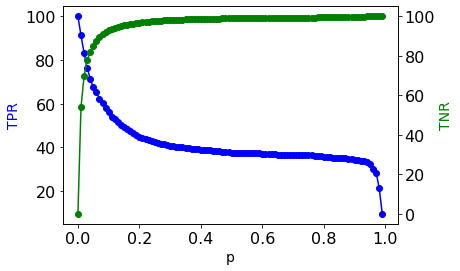

In [60]:
## create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(list_p, list_TPR, color="blue", marker="o")
# set x-axis label
ax.set_xlabel("p",fontsize=14)
# set y-axis label
ax.set_ylabel("TPR",color="blue",fontsize=14)
##
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(list_p, list_TNR,color="green",marker="o")
ax2.set_ylabel("TNR",color="green",fontsize=14)
plt.show()
# save the plot as a file

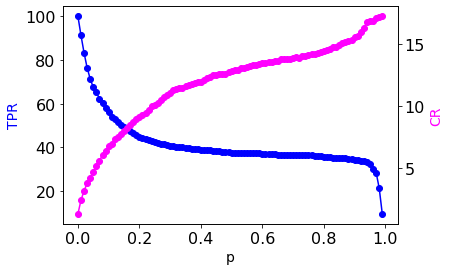

In [61]:
## create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(list_p, list_TPR, color="blue", marker="o")
# set x-axis label
ax.set_xlabel("p",fontsize=14)
# set y-axis label
ax.set_ylabel("TPR",color="blue",fontsize=14)
##
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(list_p, list_CR,color="magenta",marker="o")
ax2.set_ylabel("CR",color="magenta",fontsize=14)
plt.show()